In [1]:
# importing the dependencies

# to make dataframe - more structured data
import pandas as pd
# for making plots
import matplotlib.pyplot as plt
import seaborn as sns 
# To split our original data into training data and testing data
from sklearn.model_selection import train_test_split
# importing LinearRegression model
from sklearn.linear_model import LinearRegression
# another regression model
from sklearn.linear_model import Lasso
# metrics is used to evaluate our model- to find the accuracy, error, etc
from sklearn import metrics

In [3]:
# Data Collection and Processing

# Loading the data from csv file to pandas Dataframe
car_dataset= pd.read_csv("Car-Price-Prediction/car data.csv")

In [5]:
# inspecting the first 5 rows of the dataframe

car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
# checking the number of rows and cols

car_dataset.shape

(301, 9)

In [7]:
# getting some information abt the dataset

car_dataset.info()

# objects are categorical data
# 301 entries with no data missing as all fields are non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# checking the number of missing values 

car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
#checking the distribution of categorical data

print (car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print (car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [10]:
# Encoding the categorical data

# we encode our categorical data because ml models does not understand text 
# properly - So we assign numerical values

#encoding Fuel_type coloumn

car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)


In [11]:
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [12]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [13]:
# Splitting the data and target

# Selling price becomes our target- which we are going to predict

# The other features become the data

# Remove the Car_Name and Selling_Price

X= car_dataset.drop(['Car_Name','Selling_Price'],axis=1) 
# car name and selling price is removed from X
Y= car_dataset['Selling_Price']
# Selling price is stored in Y


In [14]:
print(X) 

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [15]:
print(Y) # in lakhs

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [16]:
# Splitting Training and Test data

# only 10 % of data is used for testing
X_train,X_test, Y_train,Y_test= train_test_split(X,Y,test_size=0.1, random_state=2)

In [17]:
# Model Training

# 1. Linear Regression model

lin_reg_model = LinearRegression()

In [18]:
# fit() is used to train our model
lin_reg_model.fit(X_train,Y_train) # trains the regression model
# and finds the line - y= mx+c


LinearRegression()

In [19]:
# Model Evaluation

# prediction on Training Data

training_data_prediction= lin_reg_model.predict(X_train)

In [20]:
# R squared Error

# depends on magnitude of values we have in traing and Y_train
error_score = metrics.r2_score(Y_train, training_data_prediction)
print('R Squared Error : ', error_score) 
# 

R Squared Error :  0.8799451660493701


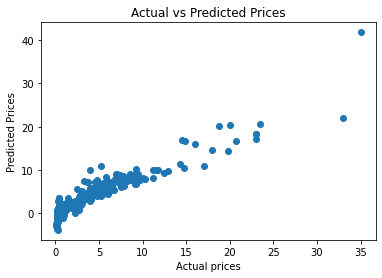

In [21]:
# Visualize the actual and predicted prices

plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual prices')
plt.ylabel('Predicted Prices')
plt.title("Actual vs Predicted Prices")
plt.show()